In [3]:
import warnings
warnings.filterwarnings("ignore")  # Ignore les warnings inutiles
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2.1) Loading and data processing**

In [4]:
#chargement des données
train_data= pd.read_csv("/content/drive/MyDrive/train.csv")
test_data= pd.read_csv("/content/drive/MyDrive/test.csv")

In [5]:
print("Train data size :", train_data.shape) #Affiche la dimansion du train
print("Test data size :", test_data.shape) #Affiche la dimansion du test

Train data size : (7352, 563)
Test data size : (2947, 563)


In [6]:
train_data.head() #Prendre connaissance de enrégistrements du train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
test_data.head()  #Prendre connaissance de enrégistrements du test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [8]:
train_data.info() # Prendre connaissance des nombre d'entrées et les types de données enrégistrées (train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [9]:
test_data.info() # Prendre connaissance des nombre d'entrées et les types de données enrégistrées (train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


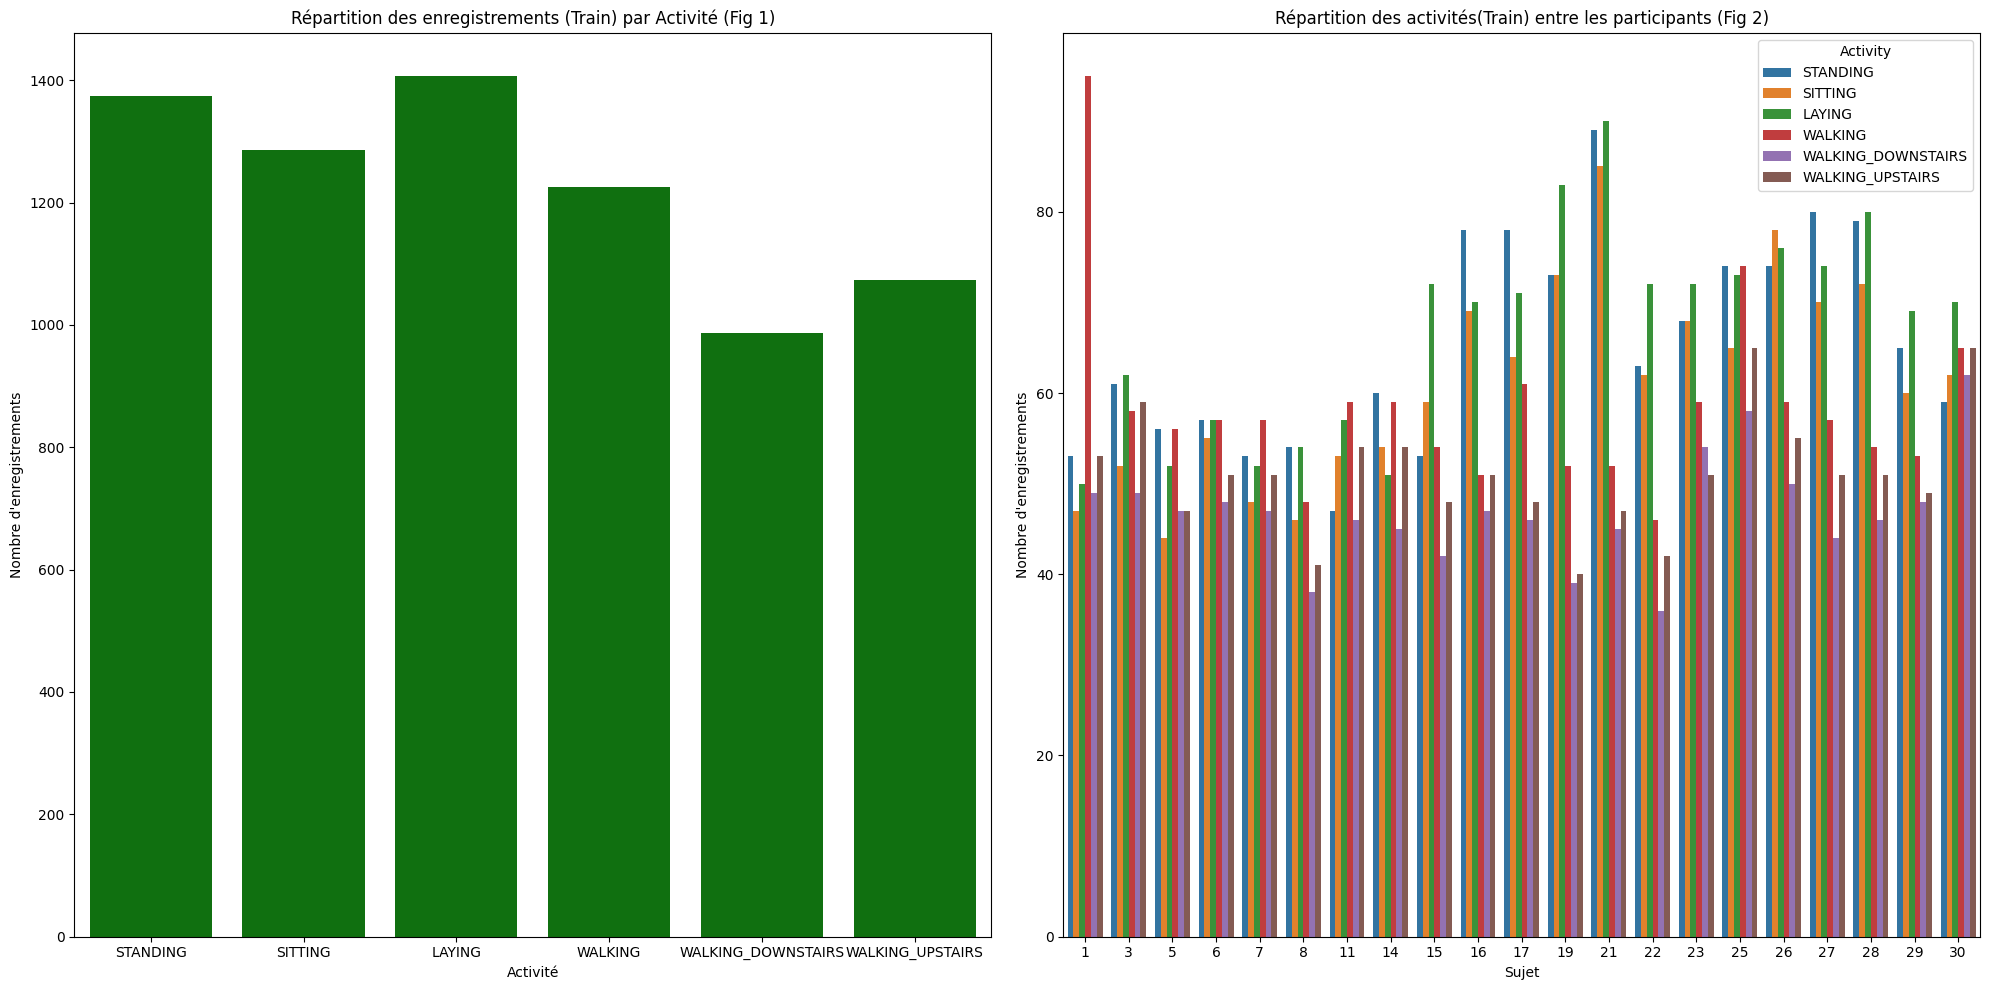

In [10]:
#Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=train_data['Activity'], ax=axes[0], color='green')
axes[0].set_title("Répartition des enregistrements (Train) par Activité (Fig 1)")
axes[0].set_xlabel("Activité")
axes[0].set_ylabel("Nombre d'enregistrements")

sns.countplot(x='subject',hue='Activity', ax=axes[1], data=train_data)
axes[1].set_title("Répartition des activités(Train) entre les participants (Fig 2)")
axes[1].set_xlabel("Sujet")
axes[1].set_ylabel("Nombre d'enregistrements")

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


**Observation:**

*   Légères différences de la distribution entre les activités (**Fig 1**)
*   les activités sont équitablements réparties entre les participants d'entrainement (**Fig 2**)



In [11]:
train= train_data.copy()
test= test_data.copy()

In [12]:
#Vérification des données manquantes
print(f"Il y a {train.isna().sum().sum()} des donnéées manques dans le train set ")  #Vérification des données manquntes
print(f"Il y a {test.isna().sum().sum()} des donnéées manques le test set ")  #Vérification des données manquntes

Il y a 0 des donnéées manques dans le train set 
Il y a 0 des donnéées manques le test set 


**Observation:** Pas de données manquantes, je n'inclurais pas sa gestion dans le pipeline.

In [13]:
# Séparation des  variables prédictives (features) et de la variable prédite (target)
X_train = train.drop(columns=["subject", "Activity"])
y_train = train["Activity"]

X_test = test.drop(columns=["subject", "Activity"])  # Features sans subject
y_test = test["Activity"]                            #Target

In [16]:
#Processu menant à la mise en place d'un pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

# 1 Création d'un transformateur personnalisé pour encoder `y_train, y_test`
class LabelEncoderTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, y):
        self.label_encoder.fit(y)
        return self

    def transform(self, y):
        return self.label_encoder.transform(y)

    def inverse_transform(self, y):
        return self.label_encoder.inverse_transform(y)

# 2 Pipeline pour X (features)
feature_pipeline = Pipeline([
    ("scaler", StandardScaler())  # Standardisation des features
])

# 3 Pipeline pour y (target)
label_pipeline = Pipeline([
    ("label_encoder", LabelEncoderTransformer())  # Encodage du label
])

# 4 Application des transformations
X_train_scaled = feature_pipeline.fit_transform(X_train)
X_test_scaled = feature_pipeline.transform(X_test)

y_train_encoded = label_pipeline.fit_transform(y_train)
y_test_encoded = label_pipeline.fit_transform(y_test)

# 5 Vérification
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)
print("Classes encodées:", label_pipeline.named_steps["label_encoder"].label_encoder.classes_)  # Voir les classes encodées


X_train_scaled shape: (7352, 561)
X_test_scaled shape: (2947, 561)
y_train_encoded shape: (7352,)
y_test_encoded shape: (2947,)
Classes encodées: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [17]:
y_train_encoded[:30]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1])

In [18]:
y_test_encoded[:30]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
X_train_scaled[:5]

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       [ 0.06669577, -0.20842166, -0.24971245, ..., -0.70168389,
         0.41465007,  0.03171414],
       [ 0.03046897,  0.02758722, -0.10984784, ..., -0.70015171,
         0.42546296,  0.04522502]])

In [20]:
X_test_scaled[:10]

array([[-2.46387617e-01, -1.36978951e-01,  1.66846245e+00, ...,
        -4.50321751e-01,  7.33571410e-01, -5.24394246e-03],
       [ 1.64234998e-01,  1.11059014e-01, -1.75547683e-01, ...,
        -4.07493207e-01,  7.48840297e-01, -9.81117639e-02],
       [ 1.41865061e-02, -2.04740346e-01, -1.59110670e-01, ...,
        -4.16639155e-01,  7.44604800e-01, -8.18030425e-02],
       ...,
       [ 1.60020710e-03, -1.79860512e-01, -1.35787540e-01, ...,
        -3.89310540e-01,  7.98050677e-01, -4.00962858e-02],
       [-2.78889989e-02, -7.98521291e-02, -9.41434584e-02, ...,
        -3.82675984e-01,  8.09524832e-01, -3.21625406e-02],
       [ 1.78997540e-02,  1.79461831e-01,  1.65370107e-01, ...,
        -3.80174695e-01,  8.14324069e-01, -2.77618500e-02]])

# **2.2) Entrainement, validation croisée**

# **2.3)Mesure de performance sur le jeu du train set (le métrique)**

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold


# Liste des modèles
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy'),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Boucle sur les modèles avec validation croisée
for name, model in models.items():
    metrics = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
     #Validation croisée
    scores = cross_validate(model, X_train_scaled, y_train_encoded, cv=3, scoring=metrics)
      #Affichage des métriques
    print(f"\n=== {name} ===")
    print(f"Accuracy Moyenne : {scores['test_accuracy'].mean():.4f}")
    print(f"Precision Moyenne : {scores['test_precision_macro'].mean():.4f}")
    print(f"Recall Moyen : {scores['test_recall_macro'].mean():.4f}")
    print(f"F1-score Moyen : {scores['test_f1_macro'].mean():.4f}")



=== SVM ===
Accuracy Moyenne : 0.9260
Precision Moyenne : 0.9270
Recall Moyen : 0.9256
F1-score Moyen : 0.9238

=== Decision Tree ===
Accuracy Moyenne : 0.8607
Precision Moyenne : 0.8604
Recall Moyen : 0.8528
F1-score Moyen : 0.8514

=== Random Forest ===
Accuracy Moyenne : 0.9055
Precision Moyenne : 0.9097
Recall Moyen : 0.9026
F1-score Moyen : 0.9019

=== XGBoost ===
Accuracy Moyenne : 0.9100
Precision Moyenne : 0.9111
Recall Moyen : 0.9070
F1-score Moyen : 0.9064


***Observation :***
Le modéles,sans hyper parametres,  demontrent un bon niveau d'apprentissage avec le jeu de train  au vus de résultats de métriques obténus. Par ailleurs Décision tree montre un peu de faiblesse par rapport aux autres

# ***2.4 -6 ) Ajout des hyper parametres, teste du meilleur avec les vrais jeu de test, matrices de confusion***

In [22]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Définition des modèles et des hyperparamètres à optimiser
param_grids = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],  # Fonction de scission
        'max_depth': [5, 10, 15],          # Profondeur de l'arbre
        'min_samples_leaf': [1, 2, 5]      # Minimum de divion
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],  # Nombre d'arbres
        'max_depth': [10, 20, None],     # Profondeur maximale
        'min_samples_split': [2, 5, 10]  # Minimum de division
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],   # Nombre d'arbres
        'learning_rate': [0.01, 0.1, 0.2], # Taux d'apprentissage
        'max_depth': [3, 5, 10]            # Profondeur de l'arbre
    }
}

# Définition des modèles
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', device='cuda')  # GPU activé
}

# Optimisation avec GridSearchCV
best_models = {}
execution_times = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Validation croisée

accuracies = {} # Crée un dictionnaire des accuracies
kfold_accuracies = {name: [] for name in models.keys()}

for name, model in models.items():
    print(f"\n Optimisation du modèle : {name} ...")

    start_time = time.time()

    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        return_train_score=True  # Activation des résultats détaillés
    )
    grid_search.fit(X_train_scaled, y_train_encoded)

    # Récupération des scores du meilleur modèle sur chaque fold
    best_idx = grid_search.best_index_  # Index de la meilleure combinaison
    fold_scores = [
        grid_search.cv_results_[f'split{i}_test_score'][best_idx]
        for i in range(cv.n_splits)
    ]
    kfold_accuracies[name] = fold_scores
    end_time = time.time()

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    best_models[name] = grid_search.best_estimator_
    execution_times[name] = end_time - start_time  # Stocke la durée d'exécution

    print(f"Meilleurs paramètres pour {name}: {best_params}")
    print(f"Meilleure accuracy (cross-validation) : {best_score:.4f}")
    print(f"Temps d'exécution: {execution_times[name]:.2f} secondes")


 Optimisation du modèle : Decision Tree ...
Meilleurs paramètres pour Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5}
Meilleure accuracy (cross-validation) : 0.9452
Temps d'exécution: 269.76 secondes

 Optimisation du modèle : Random Forest ...
Meilleurs paramètres pour Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Meilleure accuracy (cross-validation) : 0.9815
Temps d'exécution: 1446.32 secondes

 Optimisation du modèle : XGBoost ...
Meilleurs paramètres pour XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Meilleure accuracy (cross-validation) : 0.9942
Temps d'exécution: 1048.62 secondes


***Observation:***

L'otimisation des models avec le hyper parametres démontrent un meilleur résultat de préduction pour Décision tree (accuracy 94%) mais un peu d'inquiétude pour XGBoost accuracy 99%) et Random accuracy 98%) forest, il y a risque de surapprentissage sur le jeu des données du train.

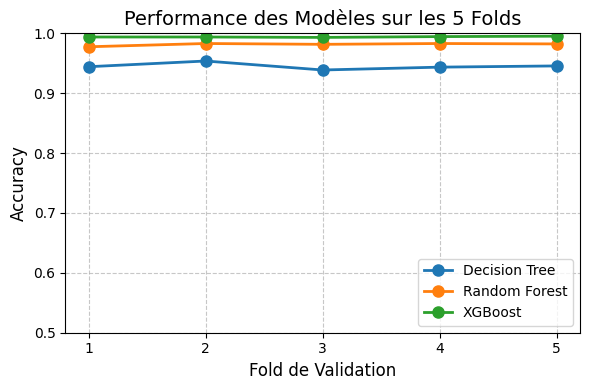

In [23]:
plt.figure(figsize=(6, 4))
for name, scores in kfold_accuracies.items():
    plt.plot(
        range(1, 6),
        scores,
        marker='o',
        linestyle='-',
        linewidth=2,
        markersize=8,
        label=name
    )

plt.xlabel('Fold de Validation', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Performance des Modèles sur les 5 Folds', fontsize=14)
plt.xticks(range(1, 6))
plt.ylim(0.5, 1.0)  #
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()

***Observation des graphes des cinq échantillons:***

pas de vairation au cours de l'apprentissage de cinq échantillons pour les modéls XGBoost et Random forest, legères amélioration pour le 2èm échantillon pour Decision tree

# **2.7) Evaluation finale**

Classes encodées: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']

=== Évaluation Finale sur le jeu de test ===
Decision Tree - Accuracy sur Test: 0.8456


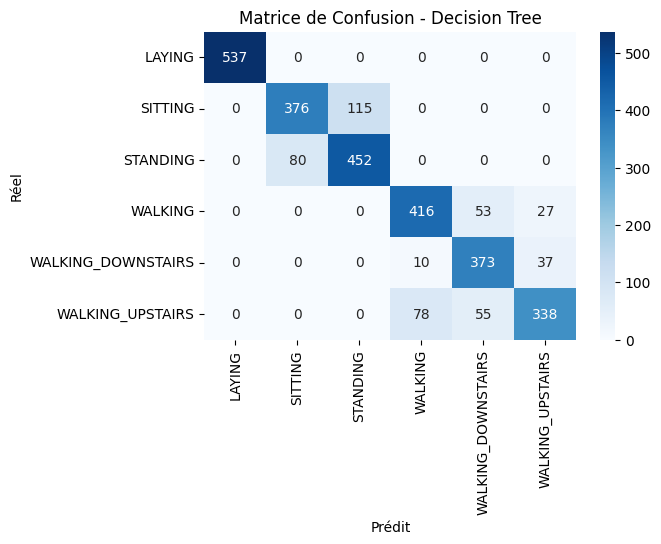

Random Forest - Accuracy sur Test: 0.9220


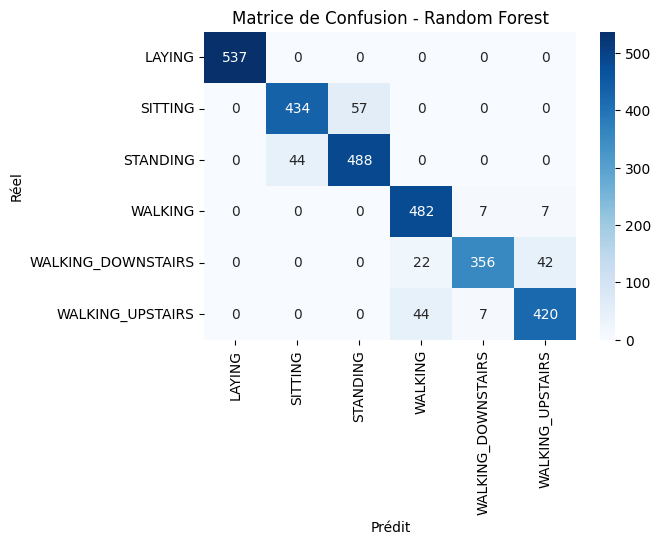

XGBoost - Accuracy sur Test: 0.9518


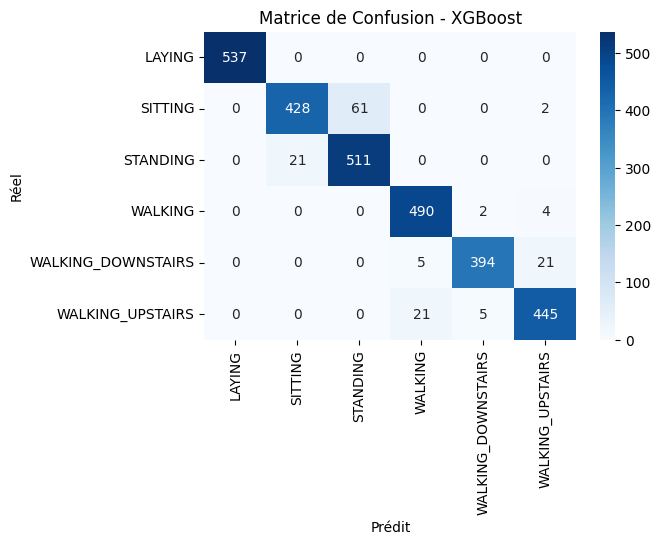


=== Comparaison des modèles ===
           Modèle              Classe  Accuracy  Précision    Rappel
0   Decision Tree              LAYING  0.845606   1.000000  1.000000
1   Decision Tree             SITTING  0.845606   0.824561  0.765784
2   Decision Tree            STANDING  0.845606   0.797178  0.849624
3   Decision Tree             WALKING  0.845606   0.825397  0.838710
4   Decision Tree  WALKING_DOWNSTAIRS  0.845606   0.775468  0.888095
5   Decision Tree    WALKING_UPSTAIRS  0.845606   0.840796  0.717622
6   Random Forest              LAYING  0.921955   1.000000  1.000000
7   Random Forest             SITTING  0.921955   0.907950  0.883910
8   Random Forest            STANDING  0.921955   0.895413  0.917293
9   Random Forest             WALKING  0.921955   0.879562  0.971774
10  Random Forest  WALKING_DOWNSTAIRS  0.921955   0.962162  0.847619
11  Random Forest    WALKING_UPSTAIRS  0.921955   0.895522  0.891720
12        XGBoost              LAYING  0.951815   1.000000  1.000000
1

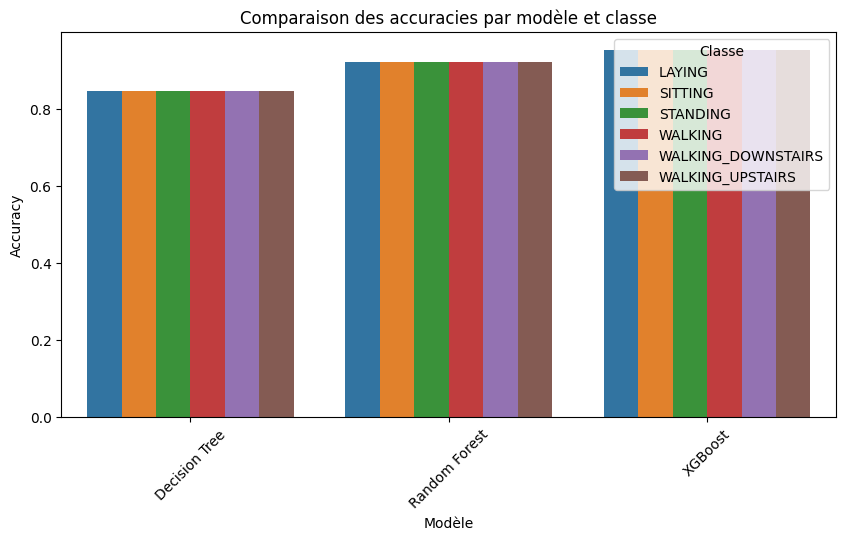

In [24]:
# . Récupération label_encoder
label_encoder = label_pipeline.named_steps["label_encoder"].label_encoder
print("Classes encodées:", label_encoder.classes_)

# . Évaluation Finale
print("\n=== Évaluation Finale sur le jeu de test ===")
comparison_data = []

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    final_acc = accuracy_score(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred, output_dict=True)

    print(f"{name} - Accuracy sur Test: {final_acc:.4f}")

    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=label_encoder.classes_,
        yticklabels=label_encoder.classes_
    )
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title(f'Matrice de Confusion - {name}')
    plt.show()

    # Stocker les métriques de chaque classe
    for class_label in label_encoder.classes_:
        class_index = np.where(label_encoder.classes_ == class_label)[0][0]
        precision = class_report[str(class_index)]["precision"]
        recall = class_report[str(class_index)]["recall"]
        comparison_data.append([name, class_label, final_acc, precision, recall])

# Création du tableau comparatif
comparison_df = pd.DataFrame(comparison_data, columns=["Modèle", "Classe", "Accuracy", "Précision", "Rappel"])
print("\n=== Comparaison des modèles ===")
print(comparison_df)

# Affichage du tableau formaté
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(data=comparison_df, x="Modèle", y="Accuracy", hue="Classe")
plt.title("Comparaison des accuracies par modèle et classe")
plt.xticks(rotation=45)
plt.show()



***Observation:***
1.   Résultats satisfaisants des modéls XGBoost (accuary : 95%) et Random Forest (accuary : 92%) sur le vrai jeu de test.
2.   Avec un accuracy de 84%, Decision reste bon mais on pourra peut-être l'améliorer en ajustant davantage les hyper parametre


3.   Tous les modéls ont une Precision et Recall  parfaie (100%) sur la Class LAYING
4.   Élément de liste



5.   Selon le tableau comparatif des accuracy par modél et par class, XGBosst semble être le meilleur

6. Les matrices de confusion démontre les performances des modéls avec des erreur insignifiants.
